In [5]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x = sym.symbols('x')
eq = (x**2)*sym.sin(0.5*x)
eq

x**2*sin(0.5*x)

In [7]:
ms = np.empty(20,dtype=object)
xrange = np.linspace(5,-5,500)
y = np.zeros([21,500])

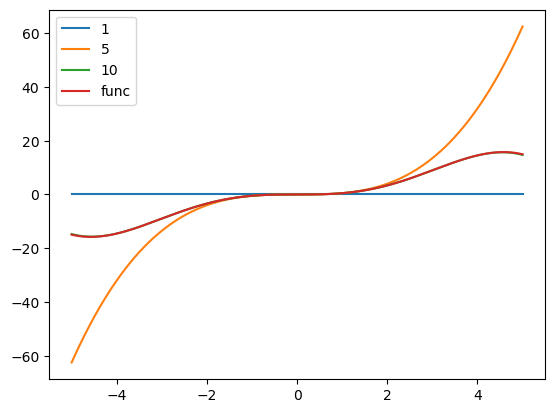

In [8]:
ms[0] = eq.subs(x,0)
ms[0]
f= sym.lambdify(x,ms[0], 'numpy')
y[0,:] = f(xrange)
for n in range(1,20):
  ms[n]= ms[n-1]+eq.diff(x,n).subs(x,0)*(x**n)/(np.math.factorial(n))
  # print(n+1, ":", ms[n])
  f=sym.lambdify(x, ms[n], 'numpy')
  y[n,:] = f(xrange)

f= sym.lambdify(x,eq, 'numpy')
y[20,:] = f(xrange)
plt.plot(xrange, y[0,:])
plt.plot(xrange, y[4,:])
plt.plot(xrange, y[9,:])
plt.plot(xrange, y[20,:])

plt.legend(["1","5","10", "func"])
plt.show()